#Assignment 3: Counting, Combinatorics & Probability




# Problem 1 - Implementing Combinatoric Functions in Python

Write your own custom `number_of_permuations` and `number_of_combinations` functions in Python. For this problem, don't import any other Python libraries. (In real life, do make use of other libraries!)

Your permuation function should accept a non-negative integer $n$ and compute $n!$ as an int.

Your combination function should accept two non-negative integers $n$ and $k$ such that $k \leq n$ and compute the value of ${n \choose k}$ as an int.

Use it to print ${10 \choose 5}$ and ${80 \choose 21}$.

In [1]:
#Broke it up bc it's easier for me that way. 
def factorial(n): 
    if n == 0 or n == 1: 
        return 1
    result = 1 

    for i in range(2, n + 1): 
        result *= i 
    return result

def number_of_permutations(): 
    return factorial(n)

def number_of_combinations(n, k): 
    if k > n: 
        return 0 
    return factorial(n) // (factorial(k) + factorial(n - k))

print("C(10, 5): ", number_of_combinations(10, 5))

print("C(80, 21): ", number_of_combinations(80, 21))

C(10, 5):  15120
C(80, 21):  516064664515637442512063581913087999999


# Problem 2 - Permutations in Python

Write a Python function called `unique_words_starting_with` that accepts two parameters, a string `letters`, and a second string `starts_with`. Your function should return a list of strings that contains all **unique** permuations of the letters in `letters`, that also begin with the string `starts_with`.

For example, `unique_words_starting_with("BANANA", "NAB")` should return:

 `['NABANA', 'NABNAA', 'NABAAN']`.

Hint: You can use functions from the `itertools` module. There are multiple ways to do this, but if you're stuck, it might be helpful to first compute *all* permuatations of `letters`. To get your results as strings, it might help to use the `''.join(s)` construction as shown [here](https://colab.research.google.com/drive/1eLl0SB0dqU-l65GzhjDe-CfyDHUh0Vgq#scrollTo=ORXc8-rXRBC6). Other built-in string functions might also be useful.

In [7]:
# Put your code here.

# Some test case ideas:
#print(unique_words_starting_with("ABC", ""))
#print(unique_words_starting_with("ABC", "B"))
#print(unique_words_starting_with("ABC", "X"))
#print(unique_words_starting_with("", "A"))
#print(unique_words_starting_with("OOH", "O"))
#print(unique_words_starting_with("BANANA", "NAB"))

import itertools

def unique_words_starting_with(letters, starts_with):
    all_permutations = itertools.permutations(letters)

    unique_words = set()

    for perm in all_permutations: 
        word = ''.join(perm)

        if word.startswith(starts_with):
            unique_words.add(word)

    return list(unique_words)


print(unique_words_starting_with("BANANA", "NAB"))


['NABNAA', 'NABAAN', 'NABANA']


# Problem 3 - Combinations in Python

Write a function that accepts a list of numbers as a parameter, and calculates how many unique *combinations* of three numbers chosen from the list can be added together to result in a sum that is *at least* 100? Each number from the list can be used only once.

Hint: You can use functions from the `itertools` module.

For example, from the list $[5, 10, 50, 100, 200]$, the 3-number combination $[10, 100, 200]$ would count, as it adds up to 310. But the 3-number combination $[5,10,50]$ would not, as it only adds up to 65.

Print to the console the results of calling your function on the following test cases:

In [10]:
import itertools

test_case_0 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
test_case_1 = [5, 10, 50, 100, 200]
test_case_2 = [10, 20, 30, 40, 50]
test_case_3 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
test_case_4 = [30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

def count_combos(number_list):
  all_combinations = itertools.combinations(number_list, 3)

  count = 0

  for comb in all_combinations:
    if sum(comb) >= 100: 
      count += 1
  
  
  return count 

print(count_combos(test_case_0)) # Hint - This should be 0.
print(count_combos(test_case_1)) # Hint - This should be 9.
print(count_combos(test_case_2)) # Hint - This should be 4.
print(count_combos(test_case_3))
print(count_combos(test_case_4))

0
9
4
113
120


# Problem 4 - Dice Rolling Monte Carlo Simulation

Write a python function `roll_dice` that uses the `random` module to simulate rolling two dice and returns the sum.

Then call your function 10,000 times. Use the results of this to estimate:

1.   The probability that the result is 7.
2.   The probability that the result is less than or equal to 4.

These results should be close to what you calculated in Problem 1.

In [13]:
from random import randint

def roll_dice():

  probability_of_7 = 0
  probability_of_4_or_less = 0

  for i in range(1001):
    die_1 = randint(1, 6)
    die_2 = randint(1, 6)

    if (die_1 + die_2 == 7): 
      probability_of_7 += 1
    elif(die_1 + die_2 <= 4): 
      probability_of_4_or_less += 1

  probability_of_7 = probability_of_7 / 1001
  probability_of_4_or_less = probability_of_4_or_less / 1001 

  return probability_of_7, probability_of_4_or_less

probability_of_7, probability_of_4_or_less = roll_dice()

# Return the sum of rolling two six-sided dice.

# Run experiment 10,000 times, use results to estimate probability of rolling a 7 or rolling a 4 or less.

print("Probability of 7 = " + str(probability_of_7))
print("Probability of 4 or less = " + str(probability_of_4_or_less))

Probability of 7 = 0.15784215784215785
Probability of 4 or less = 0.16383616383616384


# Problem 5 - Dice Rolling Probability Distribution
Call your function 10,000 times and record the results. Generate a bar graph of the possible outcomes. (How many times did you roll 2? How many times did you roll 3? Etc...)

Hint: Use a `dict` to create a map of results to the number of times you encounter that result. Then use this map to plot a bar graph, with a bar for each outcome.

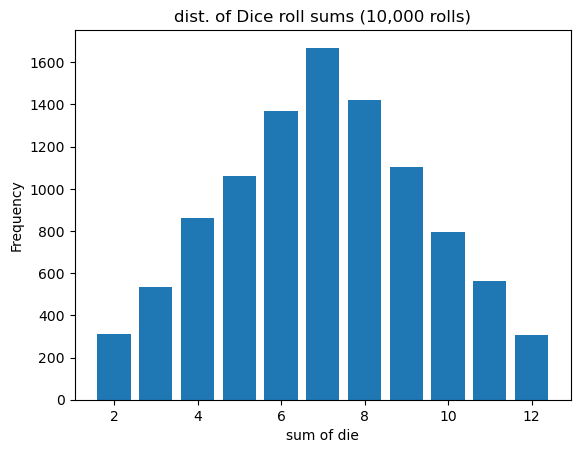

In [15]:
from random import randint
import matplotlib.pyplot as plt

# Run experiment 1000 times.
def roll_dice():
    die_1 = randint(1, 6)
    die_2 = randint(1, 6)
    return die_1 + die_2

outcome_count = {i: 0 for i in range(2, 13)}

for _ in range(10000):
    outcome = roll_dice()
    outcome_count[outcome] += 1

x = list(outcome_count.keys())
y = list(outcome_count.values())

# Plot results
plt.bar(x, y)
plt.xlabel('sum of die')
plt.ylabel('Frequency')
plt.title('dist. of Dice roll sums (10,000 rolls)')
plt.show()

# Problem 6 - Card Drawing Simulation

Use the following Python class to represent a deck of 52 cards. Each card has one of four suits (Hearts, Spades, Clubs, Diamonds) and a "rank", which is a number from 1-13.

Write a function, `draw_hand`, that simulates drawing a random 3 card hand from a full deck of cards. This function should return a `list` of 3 card objects. This should simulate drawing 3 cards from a real deck of 52 unique cards (i.e. you can't draw the same card twice!)

Call your function three times, printing the resulting list to the console each time.

Hint: One way to do this is to generate a full deck as a `list`, and then use the `shuffle` function, which takes in a list and shuffles the order of its elements. You can use your deck generating code from last week's assignment.

Execute the following code cell and use the following classes to make it easier to represent cards.

In [17]:
from enum import Enum

class Suit(Enum):
  SPADES = "Spades"
  HEARTS = "Hearts"
  CLUBS = "Clubs"
  DIAMONDS = "Diamonds"

  def __str__(self):
    return self.value


class Card:
  rank = 0
  suit = Suit.SPADES

  def __init__(self, rank, suit):
    self.rank = rank
    self.suit = suit
  
  def __str__(self):
    return str(self.rank) + " of " + str(self.suit)
  
  def __hash__(self):
    return hash(self.rank)*hash(self.suit)

  def __repr__(self):
       return self.__str__()
  
  def __eq__(self, other):
        return self.rank==other.rank and self.suit==other.suit

print(Card(1, Suit.HEARTS))
print(Card(5, Suit.DIAMONDS))
print(Card(8, Suit.CLUBS))
print(Card(12, Suit.SPADES))

1 of Hearts
5 of Diamonds
8 of Clubs
12 of Spades


In [20]:
from random import shuffle

# Put your answer here.

class Deck: 
  def __init__(self): 

    self.cards = [Card(rank, suit) for suit in Suit for rank in range(1,14)]

  def shuffle_deck(self): 
    shuffle(self.cards)

  def draw_card(self):
    return self.cards.pop()
  
  def draw_hand(self): 
    hand = [self.draw_card() for _ in range(3)]
    return hand 

# Return 3 card hand chosen randomly from 52-card deck.

deck = Deck()
deck.shuffle_deck()


print("Hand 1: ", deck.draw_hand())
print("Hand 2: ", deck.draw_hand())
print("Hand 3: ", deck.draw_hand())

Hand 1:  [9 of Diamonds, 7 of Diamonds, 4 of Spades]
Hand 2:  [12 of Hearts, 1 of Diamonds, 13 of Hearts]
Hand 3:  [1 of Clubs, 6 of Diamonds, 2 of Diamonds]


# Problem 7 - Card Drawing Monte Carlo Simulation

Write functions `is_three_of_a_kind` and `is_flush` that take in a list of 3 `Card` objects and return true of they are a three of a kind or flush, respectively.

Write Python code that runs an experiment using your `draw_hand` function to estimate the probability of drawing three of a kind of a flush. Repeat your experiemnt 10,000 times, and count the number of times you draw three of a kind and the number of times you draw a flush.

Use these results to print to the console an estimation of the probabilities of drawing a three of a kind or flush.

In [ ]:
def is_three_of_a_kind(hand):
  ranks = [card.rank for card in hand]
  count = Counter(ranks)
  return False # Return True if its a 3 of a kind

def is_flush(hand):
  return False # Return True if a flush

# Run experiment 10,000 times and estimate probabilities!

probability_of_three_of_a_kind = 0
probability_of_flush = 0

print("Probability of Three of a Kind = " + str(probability_of_three_of_a_kind))
print("Probability of Flush = " + str(probability_of_flush))

Probability of Three of a Kind = 0
Probability of Flush = 0



# Problem 8 - Multiple Choice Guessing Statistics

Write a Monte Carlo Simulation to simulate taking an $n$ question quiz, which has $k$ choices. Write a simulate_quiz function that simulates taking a quiz by guessing randomly on each question, and returns the score of that simulation, where each correct answer is worth 1 point on the quiz.

Generate a list of 1000 simulated quiz scores, where each quiz had 100 questions and 5 choices on each question. 

Then calculate both the mean and median of that data set.

Note: When "simulating" the quiz, all that matters is the final score. In other words, while there are many ways to do this simulation, you don't necessarily have to actually generate 4 choices and pick one. For each question, all that matters is whether or not the question gets guessed correctly. What are the odds of guessing an individual question correctly?

In [ ]:
from random import randint

def simulate_quiz(number_of_questions, number_of_choices):
  return 0 # Return score.

# Generate random list of 1000 simulated quiz scores.

# Calculate and print the mean.
mean_score = 0
print("Mean = " + str(mean_score))

# Find and print the median.
median_score = 0
print("Mean = " + str(median_score))

# Problem 9 - Multiple Choice Guessing Monte Carlo Simulation

Use your `simulate_quiz` function to estimate the probability of getting **at least** $p$ questions correct.

To do this, write a function `estimate_probability_of_passing`, which takes three parameters: `number_of_questions`, `number_of_choices`, and `correct_answers_needed`. Calling this function should run 100,000 experiments, record how many experiments result in a passing grade, and then use this to estimate the probability.

Use your program to output the estimated probabilities calculated in Problem 8.

In [ ]:
def estimate_probability_of_passing(number_of_questions, number_of_choices, correct_answers_needed):
  # Run experiment 100,000 times to estimate the probability of passing.
  return 0

# Print out estimates for the three parts of the previous question.

print("Probability of at 6/6 - " + str(estimate_probability_of_passing(6, 4, 6)))

print("Probability of at least 4/6 - " + str(estimate_probability_of_passing(6, 4, 4)))

print("Probability of at least 1/6 - " + str(estimate_probability_of_passing(6, 4, 1)))

Probability of at 6/6 - 0
Probability of at least 4/6 - 0
Probability of at least 1/6 - 0
